# ***Linear Regression***

## ***Universidad Central***

## ***Maestría en analítica de datos***

## ***Métodos estadísticos para analítica de datos.***
## ***Docente: Luis Andrés Campos Maldonado.***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
##
from sklearn.model_selection import train_test_split      ## Para dividir el Dataset en Train y Test 
from sklearn.metrics import mean_squared_error, r2_score  ## Para obtener las métricas de evaluación.
from sklearn.metrics import mean_absolute_error           ## Para obtener las métricas de evaluación.
from sklearn.metrics import mean_absolute_percentage_error## Para obtener las métricas de evaluación.
from sklearn.linear_model import LinearRegression         ## Modelo lineal.
## Parte estadística.
import statsmodels.formula.api  as smf                                 ## Modelos lineal.
from scipy.stats import shapiro, probplot, f, f_oneway                 ## libreria estadistica de Scipy
from statsmodels.stats.anova import anova_lm                           ## Anova del modelo lineal
##
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (15,6)
warnings.filterwarnings("ignore")
url_base = "https://raw.githubusercontent.com/lacamposm/Metodos_Estadisticos/main/data/"

# ***Regresión lineal simple.***

Consideremos la siguiente situación:

Se ha recolectado información sobre 122 individuos, cada uno de ellos respondió por:


1. ***`Exposure`:*** Numéro de años que el trabajador estuvo expuesto al polvo de algodón.

2. ***`PEFR`:*** Proporciona una medida de la capacidad pulmonar del trabajador ([tasa de flujo respiratorio](https://en.wikipedia.org/wiki/Peak_expiratory_flow)).

***¿Cómo se relaciona el `PEFR` con `Exposure`?***

In [2]:
url_data = "LM_simple_example_1.csv"
df = pd.read_csv(url_base+url_data,)
df.head()

PEFR  Exposure
0   390         0
1   410         0
2   430         0
3   460         0
4   420         1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   PEFR      122 non-null    int64
 1   Exposure  122 non-null    int64
dtypes: int64(2)
memory usage: 2.0 KB


Primero veamos la relación vía un scatterplot:

In [4]:
fig = px.scatter(df, x = "Exposure", y = "PEFR", template = "plotly_white",
                 title = "Scatterplot: Exposure vs. PEFR")
fig.show()

In [5]:
corr_coef = df.corr().iloc[0,1]
print("El coeficiente de correlación de Pearson es: {:.4f}".format(corr_coef))

El coeficiente de correlación de Pearson es: -0.2770


Recordemos que la ***regresión lineal simple*** estima cuánto cambiará `PERF` cuando `Exposure` cambie en un
cierta cantidad. Es decir, deseamos explicar si las diferencias en los niveles de `PERF` se asocian con las diferencias en los años de exposición (`Exposure`). Nuestro modelo será en este caso:


$$PERF = \beta_0 +\beta_1*Exposure+\epsilon$$ 

$\beta_0$ es una constante conocida como 
el intercepto, $\beta_1$ será la pendiente, ambos de denominan parámetros de la regresión. $\epsilon$ es un error o ruido que NO se logra explicar con el modelo. La ***regresión lineal simple*** trata de encontrar la "mejor" recta para predecir la variable ***Target*** `PEFR` como una función de la ***feature*** `Exposure`



Hacemos uso de [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [6]:
## Ajuste de regresión con sklearn
model_lm = LinearRegression()
###
y = df["PEFR"]                                            ## Target.
X = df.drop(columns = ["PEFR"])                           ## Feature.
model_lm.fit(X = X, y = y)
##
print(f"Intercepto: {model_lm.intercept_:.3f}")
print(f"Coeficiente Exposure: {model_lm.coef_[0]:.3f}")

Intercepto: 424.583
Coeficiente Exposure: -4.185


En caso que seleccionemos este ajuste muestro modelo será:

$$\hat{PEFR} = 424.583-4.185*Exposure$$

La interpretación de los coeficientes es la siguiente:

1. $\hat{\beta_0}=424.583$: Es el intercepto del modelo, note que para un valor de $Exposure=0$, se obtiene que $PEFR=424.583$, así, se espera que un trabajador sin exposición tenga ese valor medio del indicador de respiración.

2. $\hat{\beta_1}=-4.185$: Por cada aumento unitario en la variable $Exposure$ se espera que $PEFR$ disminuya en promedio el valor en $\hat{\beta_1}$

Veamos la recta de ajuste:

In [7]:
## Regresión simple, recta de ajuste por OLS.
fig = px.scatter(df, x = "Exposure", y = "PEFR", template = "plotly_white",
                 title = "Recta de ajuste por OLS", trendline="ols", 
                 trendline_color_override="yellow")
fig.show()

### ***Valores ajustados y residuales.***

Los conceptos importantes en el análisis de regresión son los valores ajustados (las predicciones con el modelo) y los residuales (errores de predicción). En general, para $Y$ variable target y $X$ variable explicativa o (feature para predicir), los datos no caen exactamente en la recta de ajuste, por lo que la ecuación de regresión debe incluir un término de error explícito $\epsilon_i$


$$Y_i=\beta_0+\beta_1*X_i+ϵ_i$$


Los ***valores ajustados***, denotados por $\hat{Y_i}$ vienes dados por la expresión:


$$\hat{Y_i}=\hat{\beta_0}+\hat{\beta_1}*X_i$$


Calculamos los residuos estimados ($\hat{\epsilon_i}$) mediante:


$$\hat{\epsilon_i}=Y_i-\hat{Y_i}$$

In [8]:
### With sklearn
fitted = model_lm.predict(X) ### Valores ajustados Yi^
resid = y - fitted           ### Residuales estimados.

In [9]:
### pd.DataFrame con los primeros resultados del ajuste
pd.DataFrame({"valor_observado":y, "valor_ajustado":fitted,"residual":resid})

valor_observado  valor_ajustado    residual
0                390      424.582807  -34.582807
1                410      424.582807  -14.582807
2                430      424.582807    5.417193
3                460      424.582807   35.417193
4                420      420.398230   -0.398230
..               ...             ...         ...
117              450      332.522124  117.477876
118              490      332.522124  157.477876
119              500      332.522124  167.477876
120              370      328.337547   41.662453
121              390      328.337547   61.662453

[122 rows x 3 columns]

## ***Anova***

Dado que queremos explicar la variabilidad de la variable `Target` con respecto a su media podemos descomponerla de la siguiente manera:

$$\sum_{i=1}^{n}(y_i-\bar{y})^{2}=\sum_{i=n}^{n}(y_i-\hat{y_i})^{2}+\sum_{i=1}^{n}(\hat{y_i}-\bar{y})^{2}$$

En la expresión expresión anterior se identifican:

1. ***Suma de cuadrados totales***:
$$SCT = \sum_{i=1}^{n}(y_i-\bar{y})^{2}$$
  Esta suma determina la variabilidad respecto a su media.

2. ***Suma de cuadrados del error:***
$$SCE=\sum_{i=n}^{n}(y_i-\hat{y_i})^{2}$$
  Esta  suma toma en cuenta la variación con la recta estimada. La variación residual que queda sin explicar por la recta de regresión.
  
3. ***Suma de cuadrados de la regresión:***
$$SCR=\sum_{i=1}^{n}(\hat{y_i}-\bar{y})^{2}$$
  La cantidad de variabilidad en las observaciones explicada por la recta regresión. Esta suma toma en cuenta la variación de las observaciones y es atribuible al efecto lineal del modelo.


Para ajustar modelos de regresión por mínimos cuadrados ordinarior vamos a hacer uso de [stastmodels](https://www.statsmodels.org/dev/generated/statsmodels.formula.api.ols.html)

In [10]:
df.columns

Index(['PEFR', 'Exposure'], dtype='object')

In [11]:
## With statsmodels. from statsmodels.stats.anova import anova_lm --->  Anova del modelo lineal   
model_lm_sm = smf.ols(formula = "PEFR ~ Exposure", data = df).fit()     ## Ajuste con statsmodels.
print(model_lm_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                   PEFR   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     9.974
Date:                Fri, 21 Oct 2022   Prob (F-statistic):            0.00201
Time:                        00:49:31   Log-Likelihood:                -735.68
No. Observations:                 122   AIC:                             1475.
Df Residuals:                     120   BIC:                             1481.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    424.5828     20.796     20.417      0.0

In [12]:
anova_lm(model_lm_sm, typ=1)

df        sum_sq        mean_sq         F    PR(>F)
Exposure    1.0  1.026333e+05  102633.255269  9.974366  0.002008
Residual  120.0  1.234764e+06   10289.702381       NaN       NaN

***La tabla anterior es una típica ANOVA***. 

El estadístico $F_{1}^{n-2}$ se utiliza para contrastar el sistema de hipótesis:

$$H_0:\beta_1=0$$
$$vs.$$
$$H_1:\beta_1\neq 0$$

Es decir, este ***mide la pertinencia o no del modelo (Significancia global del modelo).***

Para el caso específico de nuestro problema el $p$-valor de la prueba es $0.002008$, es decir, ***podemos explicar las diferencias en la variable `PEFR` con las diferencias existentes en la variable `Exposure`.***

### ***Coeficiente de determinación.***

El coeficiente de determinación se encuentra con la fórmula:

$$R^{2}=\frac{SCR}{SCT}=1-\frac{SCE}{SCT}$$

Al ser $SCT$ una medida de la variabilidad de $Y$ sin considerar el efecto de la variable regresora y $SCE$ es una medida de la variabilidad de $Y$ que queda después de haber tenido en consideración a $X$, el coeficiente de determinación, $R^{2}$ se llama con frecuencia la proporción de la variación explicada por el regresor $X$. Este valor va de 0 y hasta 1, valores cercanos a 1 implican que la mayor parte de la variabilidad de $Y$ está explicada por el modelo de regresión.

In [13]:
###
SCE = 1.234764e+06                      ## Suma de cuadrados del error.
SCR = 1.026333e+05	                    ## Suma de cuadrados de la regresión.
SCT = (1.234764e+06+1.026333e+05)
R_2 = 1- SCE/SCT
print("El valor de R^2 es: {:.4f}".format(R_2))
print("Por lo tanto el {:.2f}% de la variabilidad de PEFR queda explicada por el modelo.".format(R_2*100))
###
print()
print("R^2 Con sklearn:", model_lm.score(X,y))
### Con statsmodels
print()
print("Suma de cuadrados del error:", model_lm_sm.ssr)
print("Suma de cuadrados de la regresión:", model_lm_sm.mse_model)
print("Suma de cuadrados totales:", model_lm_sm.centered_tss)
print("R^2 con statsmodels:", model_lm_sm.rsquared)

El valor de R^2 es: 0.0767
Por lo tanto el 7.67% de la variabilidad de PEFR queda explicada por el modelo.

R^2 Con sklearn: 0.0767410228628338

Suma de cuadrados del error: 1234764.285714286
Suma de cuadrados de la regresión: 102633.25526932045
Suma de cuadrados totales: 1337397.5409836064
R^2 con statsmodels: 0.07674102286283369


## ***Análisis de residuales***

1. Debemos verificar que los residuales no estén correlacionados.
2. Homocedasticidad.
3. Que los residuales distribuyan aproximadamente normal


En primera medida debemos estimar el valor de $\sigma^{2}$, este valor está dado por la expresión:

$$\hat{\sigma}^{2}=\frac{SCE}{n-1}$$

***Que no es otra cosa que el cuadrado medio del error.***



In [14]:
## Estimación de sigma^2.
sigma_2 = 10289.702381
print("La estimación de la variabilidad del modelo es:", sigma_2)
## Estimación de sigma^2 con statsmodels.
print("La estimación de sigma^2 con statsmodels es:",model_lm_sm.scale)

La estimación de la variabilidad del modelo es: 10289.702381
La estimación de sigma^2 con statsmodels es: 10289.702380952383


### ***Normalidad.***

In [15]:
## NORMALIDAD: Test de Shapiro-Wills
## La prueba de Shapiro-Wilk prueba la hipótesis nula de que los datos se extrajeron 
## de una distribución normal.
p_value1 = shapiro(df["PEFR"])[1]                                   ### Normalidad variable target
print("El p-valor del Test de Shapiro-Wills para la variable target es: {:.3f}".format(p_value1))
##
p_value2 = shapiro(resid)[1]
print("El p-valor del Test de Shapiro-Wills para normalidad de los residuales:{:.3f}".format(p_value2))

El p-valor del Test de Shapiro-Wills para la variable target es: 0.541
El p-valor del Test de Shapiro-Wills para normalidad de los residuales:0.586


Luego no podemos rechazar la hipótesis nula, por lo tanto no tenemos evidencia estadística para decir que los residuales no distribuyen aproximadamente normal.

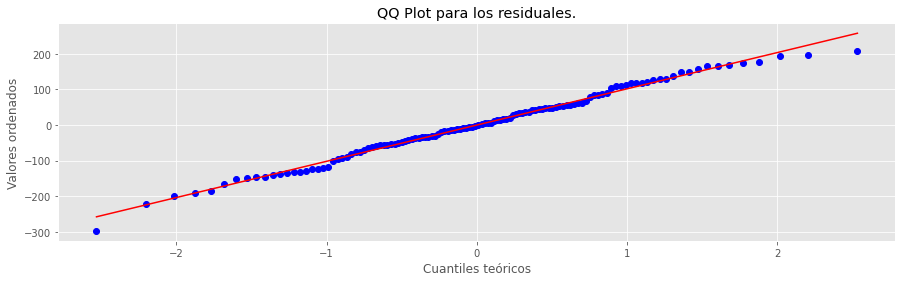

In [16]:
## QQ plot para los residuales observados. from scipy.stats import probplot
plt.figure(figsize = (15,4))
probplot(x=resid, dist="norm", plot=plt)              ## QQ-plot.
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Valores ordenados")
plt.title("QQ Plot para los residuales.")
plt.show()

Como ***conclusión*** notemos que se cumplen los supuestos del modelo, pero el poder explicativo del modelo solo llega al $7.67\%$, lo cual no es un buen indicador.

# ***Regresión lineal múltiple.***

En una regresión múltiple se tiene una variable objetivo (`Target`) $Y$ la cual es cuantitativa y es de interés para el investigador. Se quiere entonces construir una función $f(X)$ donde $X=(X_1, \ldots, X_p)$ es un conjunto de variables explicativas (`Features`) que se utilizaran para pronosticar y explicar las diferencias presentes en la variable target $Y$.

En un modelo de regresión lineal, se usan las funciones del tipo:
$$Y=\beta_0 +\beta_1X_1+\beta_2X_2+...+\beta_pX_p +\epsilon $$ 

donde $\epsilon$ se conoce como el error o ruido del modelo.

Sobre este error se realizan varios supuestos para que el modelo tenga validez estadística.
1. ***Normalidad o gaussianidad:*** Campana de Gauss
2. ***Homocedasticidad:*** La variabilidad de mi modelo no depende de las X
3. ***Independencia.***


#### ***Ejemplo 1.***


Con el objetivo de evaluar la calidad de una película utilizada en máquinas fotográficas, el  tiempo  de duración de la película,  en horas,  se relaciona con la densidad máxima de la película bajo tres condiciones experimentales: $72^{o}C$, $82^{o}C$ y $92^{o}C$. El objetivo es explicar las diferencias en el tiempo de duración de la película usando la densidad máxima  y la temperatura.

In [17]:
data2 = "chapman.xlsx"
df2 = pd.read_excel(url_base + data2, dtype={"temperatura":"category"})
df2.head()

tiempo  densidad temperatura
0      72      3.55          72
1     144      3.27          72
2     216      2.89          72
3     288      2.55          72
4     360      2.34          72

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   tiempo       21 non-null     int64   
 1   densidad     21 non-null     float64 
 2   temperatura  21 non-null     category
dtypes: category(1), float64(1), int64(1)
memory usage: 509.0 bytes


***1. Haga  un  gráfico  de  los  datos que  incluya  las  tres  variables  consideradas.  Comente.***

In [19]:
fig = px.scatter(data_frame = df2, x = "densidad", y = "tiempo",template = "plotly_white",
                 title = "Densidad vs. Tiempo", trendline="ols", 
                 trendline_color_override="yellow")
fig.show()

In [20]:
fig = px.scatter(data_frame = df2, x = "densidad", y = "tiempo", color="temperatura", 
                 template = "plotly_white" , title = "Densidad vs. Tiempo", trendline="ols")
fig.show()

Los plots anterior muestra que el tiempo de duración de una película disminuye a medida que la densidad máxima de la película aumenta, es decir, al parecer existe una relación lineal negativa entre el `Tiempo de duración` de la película y la `densidad máxima` de la película. Además es diferente según las tres condiciones experiementales, quizá se presenta interacción entre `densidad` y `temperatura`.

#### ***Ejemplo 2.***

Ajuste a los datos un modelo de regresión lineal múltiple donde la variable target es el tiempo de duración  de  la  película  y  las  variables  explicativas  son  la  densidad  máxima, la condición experimental.

In [21]:
%%capture
!pip install pingouin
import pingouin as pg

In [22]:
## Media de cada grupo de "temperatura" de la variable Target "tiempo".
df2.groupby("temperatura")["tiempo"].mean()

temperatura
72    288.0
82    192.0
92     96.0
Name: tiempo, dtype: float64

In [23]:
### Modelo con solo la feature categórica.
cate = smf.ols(formula = "tiempo ~ temperatura", data = df2).fit()
print(cate.summary())

                            OLS Regression Results                            
Dep. Variable:                 tiempo   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     5.143
Date:                Fri, 21 Oct 2022   Prob (F-statistic):             0.0171
Time:                        00:49:39   Log-Likelihood:                -127.27
No. Observations:                  21   AIC:                             260.5
Df Residuals:                      18   BIC:                             263.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           288.0000     42.33

In [24]:
pd.get_dummies(df2["temperatura"], drop_first=True)

82  92
0    0   0
1    0   0
2    0   0
3    0   0
4    0   0
5    0   0
6    0   0
7    1   0
8    1   0
9    1   0
10   1   0
11   1   0
12   1   0
13   1   0
14   0   1
15   0   1
16   0   1
17   0   1
18   0   1
19   0   1
20   0   1

In [25]:
## Esta ANOVA muestra la significancia global del modelo. Note que coincide con R^2
## de la salida anterior.
df2.anova(dv = "tiempo", between = "temperatura")

Source  ddof1  ddof2         F     p-unc       np2
0  temperatura      2     18  5.142857  0.017114  0.363636

Para este caso se observa que la diferencia de las medias es estadísticamente significativa, es decir, hay diferencias en las medias entre las categorías.

In [26]:
### Modelo SIN interacción.
model_ex2_with_inter = smf.ols(formula = "tiempo ~ densidad + temperatura", data = df2).fit()
print(model_ex2_with_inter.summary())

                            OLS Regression Results                            
Dep. Variable:                 tiempo   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     22.15
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           4.15e-06
Time:                        00:49:40   Log-Likelihood:                -115.31
No. Observations:                  21   AIC:                             238.6
Df Residuals:                      17   BIC:                             242.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           568.0902     52.72

Con el modelo anterior se logra explicar un $79.6\%$ de las diferenias de la variable `Target` (tiempo). Note además que con este modelo obtemos una expresión de la forma:

$$tiempo=568.09-105.9228*densidad - 275.07*temperatura_{\_92}-133.5269*temperatura_{\_82}+ϵ$$

En cada obtenemos una recta de regresión:

1. ***Caso 1: Corresponde a la temperatura de 72 grados.***

$$tiempo=568.09-105.9228*densidad$$: 
 
2. ***Caso 2: Corresponde a la temperatura de 82 grados.***

$$tiempo=434.57 -105.922*densidad$$
  

3. ***Caso 3: Corresponde a la temperatura de 92 grados.*** 

$$tiempo=293.016 -105.922*densidad$$

Estas rectas tienen la particularidad de que son rectas paralelas, es decir, no estamos teniendo en cuenta la ***interacción*** entre las dos 2 features.

## ***Modelado de efectos de interacción.***

Interacciones potenciales se observar de dos features tándem: `densidad` y `temperatura`. Específicamente, ¿el efecto de la densidad sobre el tiempo es diferente en cada nivel de temperatura?

In [27]:
fig = px.scatter(data_frame = df2, x = "densidad", y = "tiempo", color="temperatura", 
                 template = "plotly_white" , title = "Densidad vs. Tiempo", trendline="ols")
fig.show()

***Ejemplo 3.***

Vamos a ajustar los datos a un modelo de regresión lineal múltiple donde la variable `Target` es el tiempo de duración  de  la  película  y  las  `features` explicativas  son  la  densidad  máxima, la condición experimental  y la interacción entre estas.

In [28]:
### Modelo CON interacción.
model_ex2 = smf.ols(formula = "tiempo ~ densidad*temperatura", data = df2).fit()
print(model_ex2.summary())

                            OLS Regression Results                            
Dep. Variable:                 tiempo   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     266.3
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           4.30e-14
Time:                        00:49:40   Log-Likelihood:                -84.791
No. Observations:                  21   AIC:                             181.6
Df Residuals:                      15   BIC:                             187.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

#### ***Ejercicio 1.***

Interprete las estimaciones  de los parámetros excepto  el intercepto.

In [29]:
print(model_ex2.summary())

                            OLS Regression Results                            
Dep. Variable:                 tiempo   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     266.3
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           4.30e-14
Time:                        00:49:40   Log-Likelihood:                -84.791
No. Observations:                  21   AIC:                             181.6
Df Residuals:                      15   BIC:                             187.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [30]:
fig = px.scatter(data_frame = df2, x = "densidad", y = "tiempo", color="temperatura", 
                 template = "plotly_white" , title = "Densidad vs. Tiempo", trendline="ols")
fig.show()

#### ***Ejemplo 4.***

Estime  la duración esperada de una película con una densidad máxima de 2, y  una  temperatura  de  $82^{o}C$. Use el método `predict()` del modelo ajustado.

In [31]:
model_ex2.predict({"densidad":2,"temperatura":82})

0    225.253073
dtype: float64

***Comentario.***

El tiempo esperado de duración de una película bajo la condición experimental de $82^{o}C$ y con densidad máxima igual a 2 es de $225.2531$.

In [32]:
## Predicciones con un pd.DataFrame. Tenga en cuenta que debe tener la misma estrucutura
## del Dataset con quien se ajustó el modelo.
model_ex2.predict(df2)

0      65.846727
1     134.525026
2     227.731289
3     311.126366
4     362.635090
5     411.691018
6     502.444484
7      50.961105
8      70.454285
9     167.920189
10    213.786496
11    236.719650
12    286.025930
13    318.132346
14     18.255795
15     44.980366
16     76.078048
17    113.978347
18    128.069484
19    135.843905
20    154.794055
dtype: float64

## ***Ejemplo 3***


El Dataset se obtuvo de [`Kaggle`](https://www.kaggle.com/harlfoxem/housesalesprediction) e incluye precios de venta de casas en el estado de Washington (condado de King, donde se encuentra Seattle) entre mayo de 2014 y mayo de 2015.

Vamos a crear un modelo que use como variable target el precio de venta (`price`) y  como las features las características de los predios. Todo basado en ventas anteriores en Seattle para recomendar un precio de venta óptimo.



In [33]:
df = pd.read_csv(url_base + "kc_house_data.csv",)
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [34]:
df.shape

(21613, 21)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## ***Exploración de datos***


Comencemos por revisar las columnas del conjunto de datos y lo que significan:

1. **id**: Identificación para la casa.
2. **date**: Fecha de venta de la casa.
3. **price**: Precio al que se vendió la casa.
4. **bedrooms**: Número de habitaciones.
5. **bathrooms**: Número de baños.
6. **sqft_living**: Pies cuadrados de la casa.
7. **sqft_lot**: Pies cuadrados del lote.
8. **floors**: Total de pisos (niveles) en casa.
9. **waterfront**: Si la casa tiene o no una vista de un al mar.
10. **view**: Un índice de 0 a 4 de qué tan buena es la vista desde la propiedad
11. **condition**: Condición de la casa (que tan buena está).
12. **grade**: Calificación general otorgada a la unidad de vivienda, basada en el sistema de calificación del condado de King.
13. **sqft_above**: Pies cuadrados de la casa en la parte del sótano.
14. **sqft_basement**: Pies cuadrados del sótano.
15. **yr_built**: Año en que se construyó la casa
16. **yr_renovated**: Año en que fué renovada la casa.
17. **zipcode**: Código postal de la casa
18. **lat**: Coordenada de latidad del predio.
19. **long**: Coordenada de longitud del predio.
20. **sqft_living15:** Área de la sala de estar en 2015 (implica: algunas renovaciones) Esto podría o no haber afectado el área del tamaño del lote.
21. **sqft_lot15:** Pies cuadrado del lote (implica algunas revonaciones)

In [36]:
##  Vamos a formar nuestro Dataset de trabajo
df_ml = df.copy()
df_ml = df_ml.drop(columns = ["id","sqft_living15","sqft_lot15"])

In [37]:
df["waterfront"].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [38]:
### Notemos que variables como "waterfront", "zipcode","view" no estan en el tipo de feature que 
## realmente es. Vamos a definir el tipo correcto de Dato
df_ml["waterfront"] = df_ml["waterfront"].astype("category")
df_ml["zipcode"] = df_ml["zipcode"].astype("category")
df_ml["view"] = df_ml["view"].astype("category")

In [39]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   date           21613 non-null  object  
 1   price          21613 non-null  float64 
 2   bedrooms       21613 non-null  int64   
 3   bathrooms      21613 non-null  float64 
 4   sqft_living    21613 non-null  int64   
 5   sqft_lot       21613 non-null  int64   
 6   floors         21613 non-null  float64 
 7   waterfront     21613 non-null  category
 8   view           21613 non-null  category
 9   condition      21613 non-null  int64   
 10  grade          21613 non-null  int64   
 11  sqft_above     21613 non-null  int64   
 12  sqft_basement  21613 non-null  int64   
 13  yr_built       21613 non-null  int64   
 14  yr_renovated   21613 non-null  int64   
 15  zipcode        21613 non-null  category
 16  lat            21613 non-null  float64 
 17  long           21613 non-null  

[`Conjuntos train y test`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [40]:
### Creamos el conjunto de test y train.
X_train, X_test = train_test_split(df_ml,random_state=42)

In [41]:
X_train

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
5945   20150505T000000  268643.0         4       2.25         1810      9240   
8423   20140708T000000  245000.0         3       2.50         1600      2788   
13488  20150115T000000  200000.0         4       2.50         1720      8638   
20731  20150427T000000  352499.0         2       2.25         1240       705   
2358   20141205T000000  232000.0         3       2.00         1280     13356   
...                ...       ...       ...        ...          ...       ...   
11964  20141113T000000  378000.0         3       1.50         1000      6914   
21575  20141111T000000  399950.0         3       2.50         3087      5002   
5390   20140930T000000  575000.0         3       2.50         2120      4780   
860    20140620T000000  245000.0         1       0.75          380     15000   
15795  20150325T000000  315000.0         4       2.50         3130      5999   

       floors waterfront view  condition  grade  sqft_above  sqft_basement  \
5945      2.0          0    0          3      7        1810              0   
8423      2.0          0    0          4      7        1600              0   
13488     2.0          0    0          3      8        1720              0   
20731     2.0          0    0          3      7        1150             90   
2358      1.0          0    0          3      7        1280              0   
...       ...        ...  ...        ...    ...         ...            ...   
11964     1.0          0    0          3      7        1000              0   
21575     2.0          0    0          3      8        3087              0   
5390      2.0          0    0          3      7        2120              0   
860       1.0          0    0          3      5         380              0   
15795     2.0          0    0          3      7        3130              0   

       yr_built  yr_renovated zipcode      lat     long  
5945       1961             0   98055  47.4362 -122.187  
8423       1992             0   98031  47.4034 -122.187  
13488      1994             0   98003  47.2704 -122.313  
20731      2009             0   98027  47.5321 -122.073  
2358       1994             0   98042  47.3715 -122.074  
...         ...           ...     ...      ...      ...  
11964      1947             0   98125  47.7144 -122.319  
21575      2014             0   98023  47.2974 -122.349  
5390       2004             0   98053  47.6810 -122.032  
860        1963             0   98168  47.4810 -122.323  
15795      2006             0   98042  47.3837 -122.099  

[16209 rows x 18 columns]

### ***Variable Target***

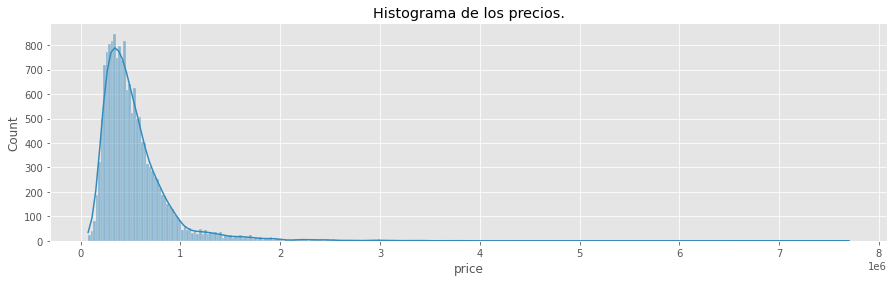

In [42]:
### Como distribuye la variable Target.
plt.figure(figsize=(15,4))
sns.histplot(X_train["price"], kde= True)
plt.title("Histograma de los precios.")
plt.show()

In [43]:
## Shapiro Test.
shapiro(X_train["price"]) 
## No hay normalidad...

ShapiroResult(statistic=0.7188555002212524, pvalue=0.0)

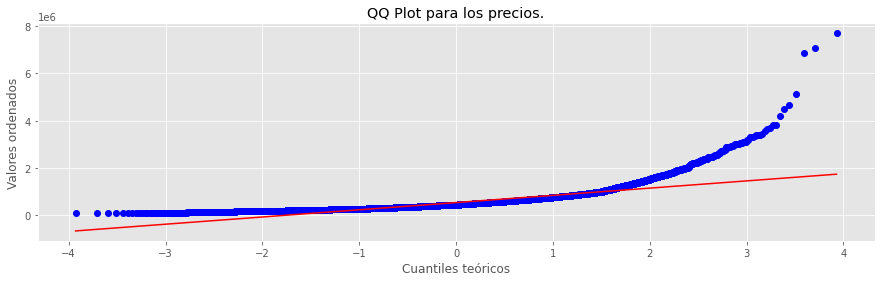

In [44]:
## QQ plot de la variable Target ----> "price"
plt.figure(figsize = (15,4))
probplot(x=X_train["price"], dist="norm", plot=plt) ## QQ-plot.
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Valores ordenados")
plt.title("QQ Plot para los precios.")
plt.show()

Notemos que la distribución se aleja bastante de la distribución normal. El algunos casos podemos buscar normalizar la variable Target. Recuerde que puede usar la transformación de [Box-Cox](https://es.wikipedia.org/wiki/Transformaci%C3%B3n_Box-Cox).

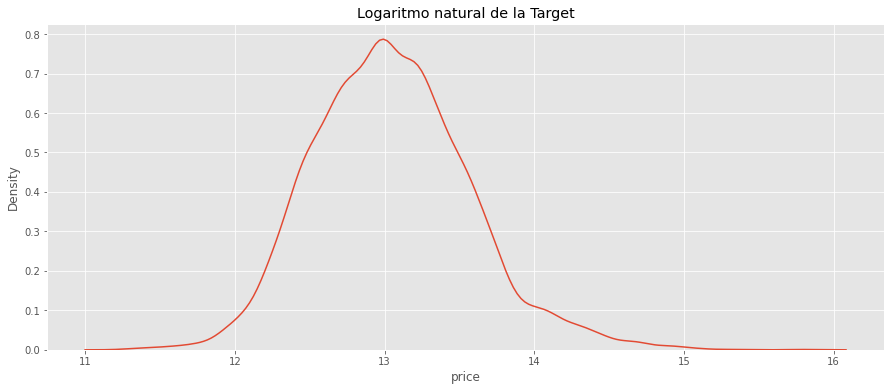

In [45]:
## Note que podemos hacer uso de la siguiente transformación: (Coincide con Box-Cox!!!)
sns.kdeplot(np.log(X_train["price"]))
plt.title("Logaritmo natural de la Target")
plt.show()

$$Z=\beta_0 +\beta_1X_1+\beta_2X_2+...+\beta_pX_p +\epsilon $$

Donde $Z=\ln(Y)$



In [46]:
### Recodermos que nuestra variable objetivo es "price", vamos a considerar su logaritmo.
try:
  X_train["log_price"] = np.log(X_train["price"])
  ##
  X_test["log_price"] = np.log(X_test["price"])
except:
  print("OJO")

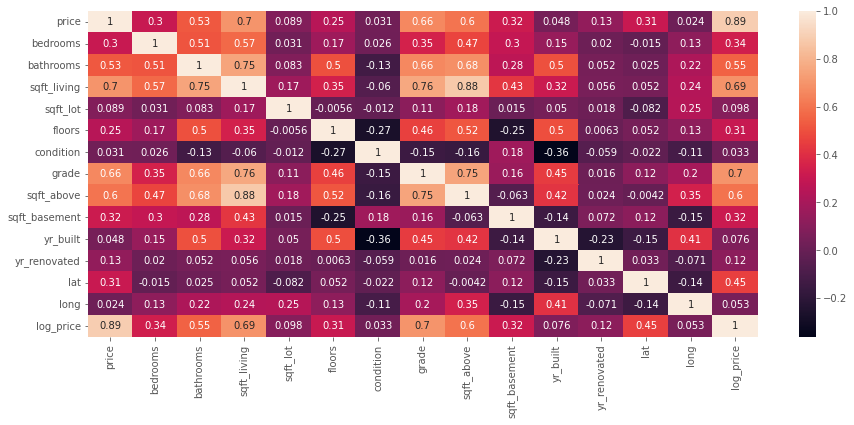

In [47]:
## Veamos las correlaciones. Tomemos un umbral pues tenemos bastantes variables
sns.heatmap(X_train.corr(), annot = True)
plt.show()

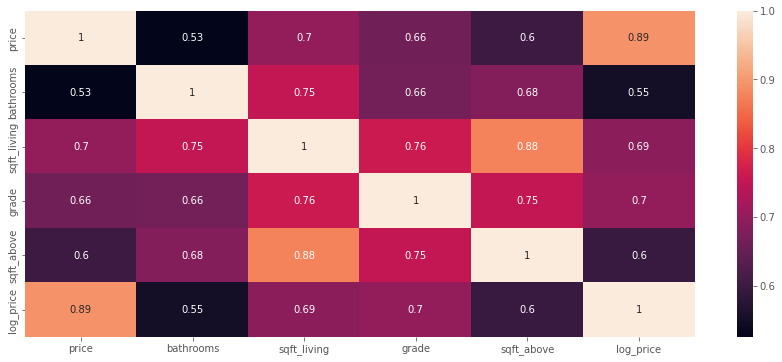

In [48]:
higt_corr = X_train.corr().loc["log_price"]
##
more_corre = higt_corr.index[(0.5<np.abs(higt_corr))&(np.abs(higt_corr)<1)].to_list()
more_corre.append("log_price")
temp = X_train[more_corre]
sns.heatmap(temp.corr(), annot = True, )
plt.show()

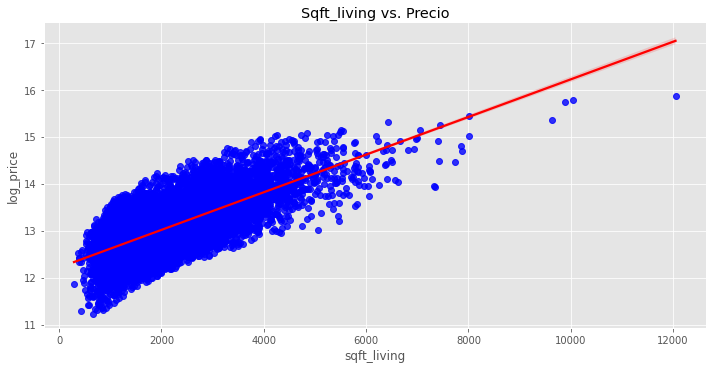

In [49]:
## Exploración con feature relacionada de manera natural y correlación alta.
sns.lmplot(data = X_train,  x="sqft_living", y="log_price", line_kws={"color": "red"},
           scatter_kws={"color":"blue"}, aspect=2)
plt.title("Sqft_living vs. Precio")
plt.show()

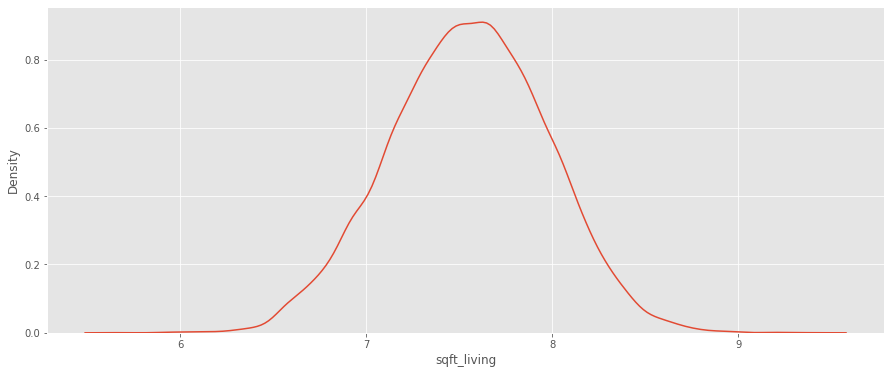

In [50]:
## Veamos el comportamiento del logaritmo de "sqft_living"
sns.kdeplot(x = np.log(X_train["sqft_living"]))
plt.show()

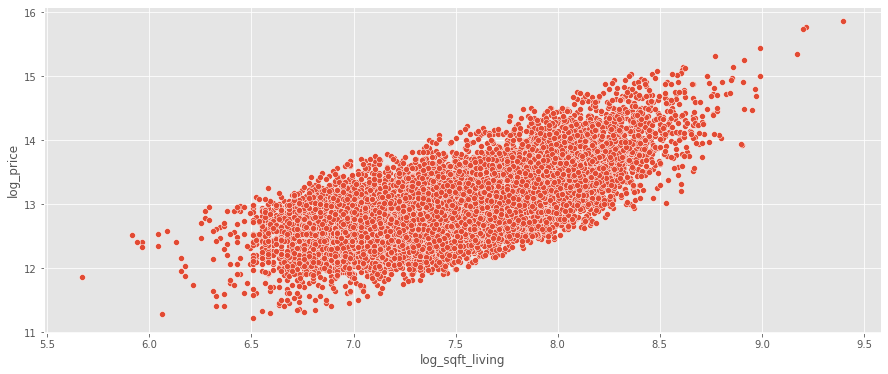

In [51]:
### Tomamos logaritmo a la feature "sqft_living" vs "log_price"
temp = np.log(X_train["sqft_living"])
temp1 = X_train["log_price"]
##
sns.scatterplot(x=temp,y=temp1)
plt.xlabel("log_sqft_living")
plt.show()

In [52]:
try:
  X_train["log_sqft_living"] = np.log(X_train["sqft_living"])
  X_train = X_train.drop(columns = ["sqft_living"])
  ##
  X_test["log_sqft_living"] = np.log(X_test["sqft_living"])
  X_test = X_test.drop(columns = ["sqft_living"])
except:
  print("OJO")

### ***Modelo Log-Log.***


El primer modelo de inspección es:

$$
\log(price) = \beta_0 + \beta_1 \log(sqft{\_}living) + \varepsilon
$$

In [53]:
formula = "log_price~log_sqft_living"
log_log_model = smf.ols(formula,data = X_train).fit()
print(log_log_model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                 1.330e+04
Date:                Fri, 21 Oct 2022   Prob (F-statistic):               0.00
Time:                        00:49:50   Log-Likelihood:                -7663.4
No. Observations:               16209   AIC:                         1.533e+04
Df Residuals:                   16207   BIC:                         1.535e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.7717      0.054    1

Tenemos que ser conscientes de cómo interpretamos los coeficientes aquí. En una regresión en la que tanto la variable independiente como la dependiente son transformaciones logarítmicas (una *log-log regression*), el coeficiente $\beta_1$ debe interpretarse como el *cambio porcentual* en la variable dependiente asociada con el 1\% de cambio en la variable independiente. Esta comparación de cambio de porcentaje frente a porcentaje se conoce como **elasticidad**. Así, en nuestro modelo:

---

***Un aumento del 1\% en la superficie habitable se asocia con un aumento del 0,8368\% en el precio.***



---

## ***Construyendo un modelo para el problema.***


In [54]:
## Tenemos las más correlacionadas
print(more_corre)

['price', 'bathrooms', 'sqft_living', 'grade', 'sqft_above', 'log_price']


In [55]:
## Vamos a construir una primera regresión "sería"
formula1 = """log_price ~ bathrooms+ log_sqft_living + grade + sqft_above"""
###
model1 = smf.ols(formula1,data = X_train).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     4833.
Date:                Fri, 21 Oct 2022   Prob (F-statistic):               0.00
Time:                        00:49:50   Log-Likelihood:                -6155.5
No. Observations:               16209   AIC:                         1.232e+04
Df Residuals:                   16204   BIC:                         1.236e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.8192      0.089     

Notemos que `bathrooms` no es significativo para la regresión. ¿Por qué?

In [56]:
formula1 = """log_price ~log_sqft_living + grade + sqft_above"""
temp = smf.ols(formula = formula1,data = X_train).fit()
print("R^2 CON la variable bathrooms",temp.rsquared_adj)
print("R^2 SIN la variable bathrooms",model1.rsquared_adj)

R^2 CON la variable bathrooms 0.5439036635267493
R^2 SIN la variable bathrooms 0.5439152168873231


***Como $R^{2}_{adj}$ penaliza el ingreso de features NO relevantes al modelo, no la vamos a considerar.***

In [57]:
try:
  X_train = X_train.drop(columns = ["bathrooms"])
  ###
  X_test = X_test.drop(columns = ["bathrooms"])
except:
  print("OJO")

¿En el contexto del problema que otras features considera importantes?. Podemos pensar en:

1. ***Ubicación del predio (`zipcode`).***
2. ***Cercania al mar (`waterfroont`).***
3. ***Vista del predio (`view`)***

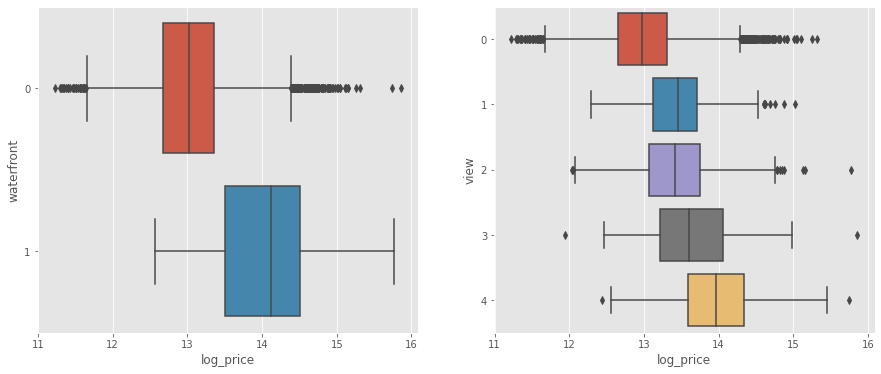

In [58]:
## Sirven para discriminar??
fig, ax = plt.subplots(1,2)
sns.boxplot(data = X_train, x = "log_price", y = "waterfront", ax = ax[0])
sns.boxplot(data = X_train, x = "log_price", y = "view", ax = ax[1])
plt.show()

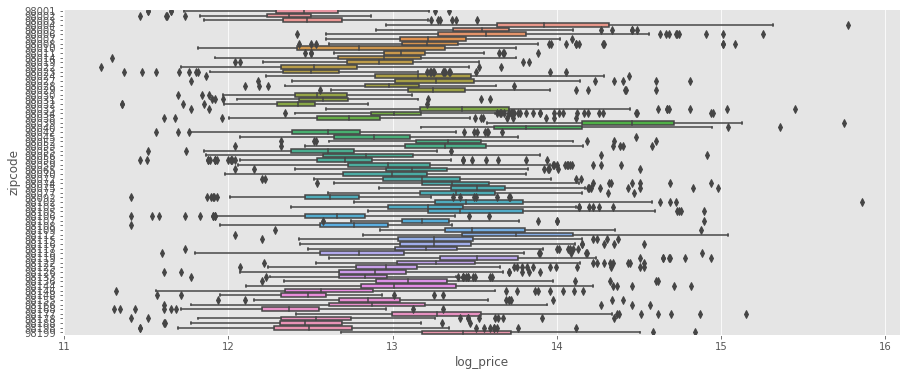

In [59]:
sns.boxplot(data = X_train, x = "log_price", y = "zipcode")
plt.show()

***Vamos a incorporarlas al modelo.***

In [60]:
### Adicionamos al modelo "waterfront, "zipcode, "view""
formula2 = formula1 + "+waterfront+zipcode+view"
model2 = smf.ols(formula2,data = X_train).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1380.
Date:                Fri, 21 Oct 2022   Prob (F-statistic):               0.00
Time:                        00:49:55   Log-Likelihood:                 3905.9
No. Observations:               16209   AIC:                            -7656.
Df Residuals:                   16131   BIC:                            -7056.
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            8.7378      0.047  

Hasta este momento hemos tenido en cuenta las siguientes features para incluir en el modelo:

1. `log_sqft_living` (sqft_living).
2. `zipcode`.
3. `view`
4. `waterfront`
5. `grade`.
6. `sqft_above`

Además de una feature que no ingresará al modelo:

1. `bathrooms`

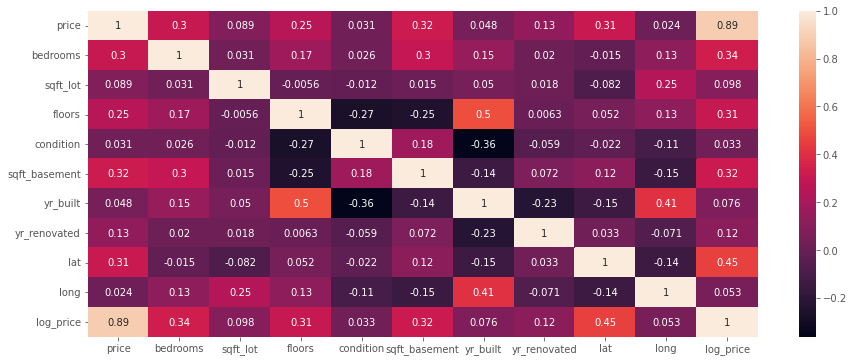

In [61]:
list_columns_to_use = ["log_sqft_living","grade","sqft_above","waterfront","zipcode","view"]
### Features no analizadas aún.
df_no_ana = X_train[[col for col in X_train.columns if col not in list_columns_to_use ]]
###
sns.heatmap(df_no_ana.corr(),annot = True)
plt.show()

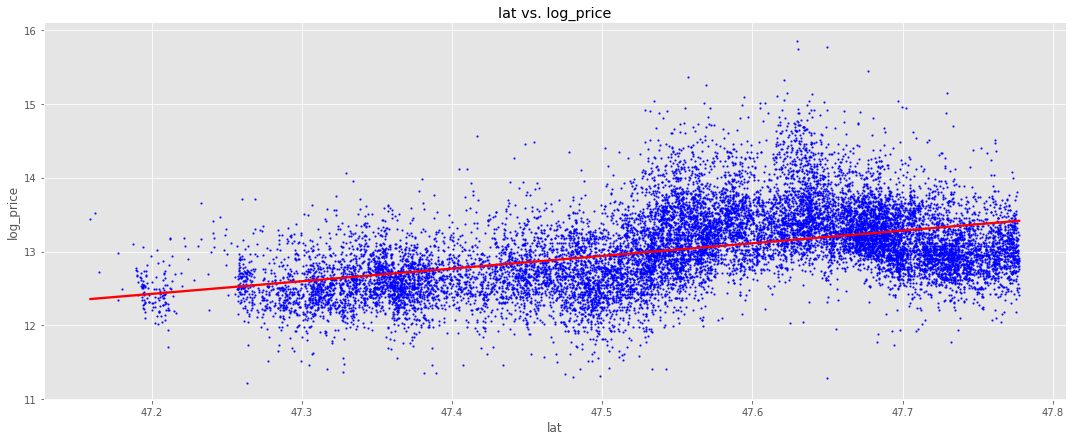

In [62]:
## Veamos el comportamiento de "lat"
### Veamos nuevamente el ajuste por regresión
sns.lmplot(data = X_train,  x="lat", y="log_price", line_kws={"color": "red"}, height=6, aspect = 2.5,
           scatter_kws={"color":"blue","s": 1.5})
plt.title("lat vs. log_price")
plt.show()

Note que existe cierta relación lineal entre la variable `Target` y `lat`, además, puede observar lo siguiente:

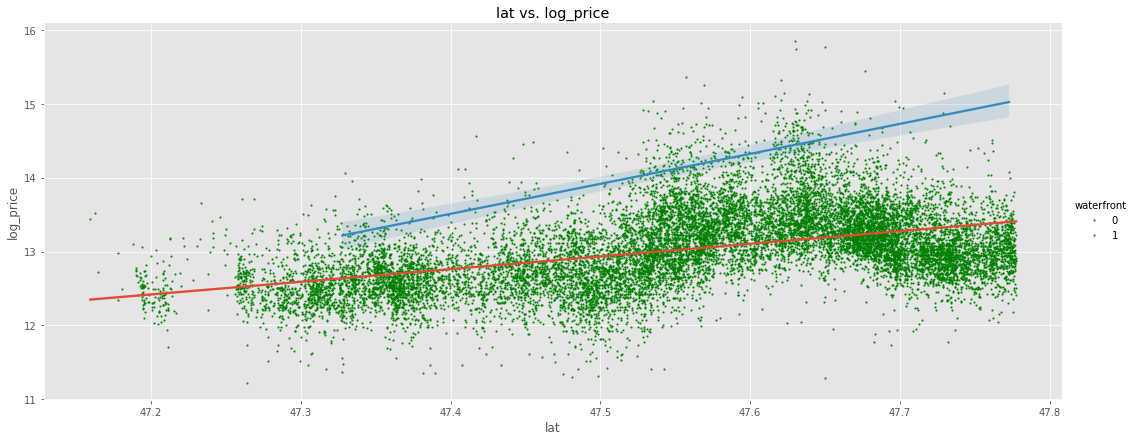

In [63]:
### Interacción este un par de features.
sns.lmplot(data = X_train,  x="lat", y="log_price", height=6, aspect = 2.5,
           scatter_kws={"color":"green","s": 1.5}, hue = "waterfront")
plt.title("lat vs. log_price")
plt.show()

***El plot anterior sugiere que podemos ingresar `lat` además del efecto de la interacción***

In [64]:
### Adicionamos al modelo "lat" y su interacción con "waterfront".
formula3 = formula2 + "+lat"
model3 = smf.ols(formula3,data = X_train).fit()
print(model3.summary())
### Finalmente con quedamos con solo "lat"

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1367.
Date:                Fri, 21 Oct 2022   Prob (F-statistic):               0.00
Time:                        00:50:04   Log-Likelihood:                 3926.6
No. Observations:               16209   AIC:                            -7695.
Df Residuals:                   16130   BIC:                            -7087.
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -17.5708      4.101  

In [65]:
print(model3.rsquared_adj)

0.86794062466318


In [66]:
## Inspeccionando una nueva feature ----> "sqft_lot"
X_train["sqft_lot"].describe().to_frame().T

count          mean           std    min     25%     50%      75%  \
sqft_lot  16209.0  14867.673145  38825.702074  520.0  5004.0  7599.0  10631.0   

                max  
sqft_lot  1164794.0

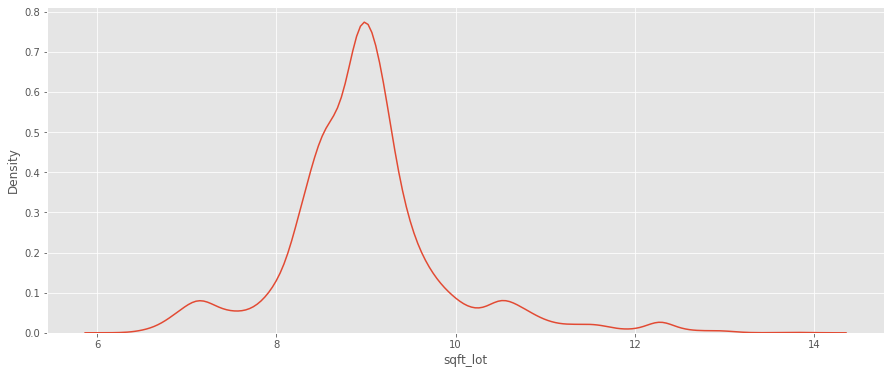

In [67]:
sns.kdeplot(x=np.log(X_train["sqft_lot"]))
plt.show()

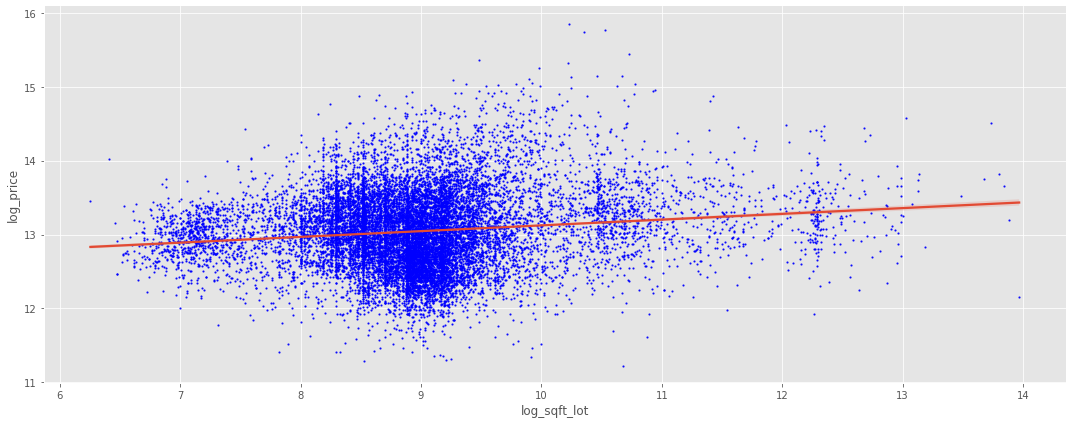

In [68]:
### Buscamos mejorar el modelo incluyendo una nueva feature.
temp = pd.DataFrame()
temp["log_sqft_lot"] = np.log(X_train["sqft_lot"])
temp["log_price"] = X_train["log_price"]
sns.lmplot(data=temp, x = "log_sqft_lot", y = "log_price", height=6, aspect = 2.5,
           scatter_kws={"s": 1.5,"color":"blue"}) 
plt.show()

In [69]:
### Recodermos que nuestra variable objetivo es "price", vamos a considerar su logaritmo.
try:
  X_train["log_sqft_lot"] = np.log(X_train["sqft_lot"])
  X_train = X_train.drop(columns = ["sqft_lot"])
  ###
  X_test["log_sqft_lot"] = np.log(X_test["sqft_lot"])
  X_test = X_test.drop(columns = ["sqft_lot"])

except:
  print("OJO")

In [70]:
### Adicionamos al modelo np.log(sqft_lot)
formula4 = formula3 + "+log_sqft_lot+yr_built"
model4 = smf.ols(formula4,data = X_train).fit()
#print(model4.summary())

In [71]:
formula4

'log_price ~log_sqft_living + grade + sqft_above+waterfront+zipcode+view+lat+log_sqft_lot+yr_built'

In [72]:
## Tarea 3. Construir un modelo lineal normal que mejore el valor de R^2_adj de 0.8766568924361327
## y NO se sobreajuste.
print(model4.rsquared_adj)

0.8766568924361327


## ***Evaluación del rendimiento predictivo***

Para cualquier Dataset, los residuales proporcionan la diferencia entre la predicción del modelo para ese registro y el valor real de ese punto.

In [73]:
## Las variables a considerar en el modelo son:
## A CONSIDERAR: waterfront, zipcode,  log_sqft_living, view, grade, sqft_above, lat, np.log(sqft_lot)
## NO CONSIDERAR: date, bedrooms, floors, condition, sqft_above, sqft_basement, yr_renovated
## NO CONSIDERAR: long, renovated

In [74]:
list_to_drop = ["date","bedrooms","floors","condition","sqft_basement","yr_renovated", "long",]
###
X_test = X_test.drop(columns = list_to_drop)
###
X_train = X_train.drop(columns = list_to_drop)

***Modelo estimado donde las variables son las dadas en formula4***

$$\hat{Z}=\hat{\beta_0} +\hat{\beta_1}X_1+\hat{\beta_2}X_2+...+\hat{\beta_p}X_p$$

Donde $\hat{Z}=\ln(\hat{Y})$

In [79]:
formula4

'log_price ~log_sqft_living + grade + sqft_above+waterfront+zipcode+view+lat+log_sqft_lot+yr_built'

In [75]:
## Valores con predicción en el modelo
y_pred_train = np.exp(model4.predict(X_train))
y_pred_test = np.exp(model4.predict(X_test))
## Verdaderos valores.
y_train = X_train["price"]
y_test = X_test["price"]

El **error absoluto medio (MAE)** es una métrica que resume el rendimiento holístico (del todo) del modelo en toda la data. El MAE se calcula tomando el valor absoluto de cada residuo y luego tomando la media de todos esos valores absolutos. En esencia, el MAE describe la magnitud típica de los residuales; cuanto menor sea el MAE, mejor.

$$MAE = \frac{1}{n} \sum_{i=1}^n \left| y_i - \hat{y}_i \right|$$


In [76]:
print("TRAIN MAE:",mean_absolute_error(y_train,y_pred_train))
print("TEST MAE:",mean_absolute_error(y_test,y_pred_test))

TRAIN MAE: 73669.18862812844
TEST MAE: 77005.52127554012


El **error cuadrático medio (RMSE)** se calcula tomando el cuadrado de cada residuo, promediando y luego sacando la raíz cuadrada.

$$RMSE = \sqrt{ \frac{1}{n} \sum_{i=1}^n ( y_i - \hat{y}_i )^2 }$$



Aunque `RMSE` puede parecer innecesariamente complicado en comparación con MAE, se usa mucho más comúnmente. La razón es que la métrica `RMSE` es la misma que se minimiza en los datos de entrenamiento mediante un modelo de regresión lineal estándar (también llamado regresión de **mínimos cuadrados ordinarios (OLS)**). Esto lo convierte en una opción "natural" que utiliza la misma métrica para evaluar el rendimiento fuera de la muestra (`test`). Considere lo siguiente:

El `RMSE` pone mucho más peso en los valores atípicos, ya que los errores se elevan al cuadrado antes de promediarlos. En los casos en que los valores atípicos son especialmente malos y deben castigarse, el RMSE es una mejor opción.

In [77]:
print("TRAIN RMSE:",mean_squared_error(y_train,y_pred_train,squared=False))
print("TEST RMSE:",mean_squared_error(y_test,y_pred_test,squared=False))

TRAIN RMSE: 124091.60618066338
TEST RMSE: 141927.46888383437


Finalmente, está el **error porcentual absoluto medio** (MAPE). Esto toma el valor absoluto de cada residual y lo divide por el valor real de ese punto para obtener un porcentaje, luego promediando todos los porcentajes.

$$MAPE = 100\% \frac{1}{n} \sum_{i=1}^n \left|\frac{ y_i - \hat{y}_i}{y_i} \right|$$

El `MAPE` tiene una buena interpretación en la que podemos decir que las predicciones de un modelo son, en promedio, incorrectas en un cierto porcentaje. 

In [78]:
print("TRAIN MAPE:",100*mean_absolute_percentage_error(y_train,y_pred_train))
print("TEST MAPE:",100*mean_absolute_percentage_error(y_test,y_pred_test))

TRAIN MAPE: 13.869103308501025
TEST MAPE: 13.94465409412411


Nuestro modelo podría tener un promedio de descuento del 13%. Dicho modelo a menudo se describe como "87% preciso".

# ***Referencias***

1. "House Sales in King County, USA", August 25, 2016, harlfoxem, CC0 Public Domain, https://www.kaggle.com/harlfoxem/housesalesprediction

2. _R. E. Chapman, Degradation Study of a Photographic Developer to Determine Shelf Life, Quality Engineering 10 (1997), pp. 137 – 140._